### Day 4 - Persistence Forecast Model

In [2]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot

In [3]:
def parser(x):
    return datetime.strptime('190' + x, '%Y-%m')

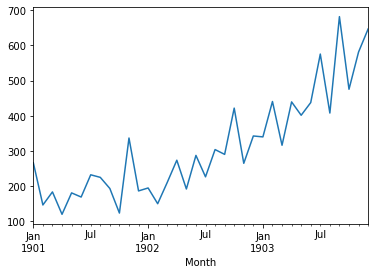

In [5]:
series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series.plot()
pyplot.show()

### 1. Define the Supervised Learning Problem

In [8]:
from pandas import DataFrame
from pandas import concat

values = DataFrame(series.values)
df = concat([values.shift(1), values], axis=1)
df.columns = ['t-1', 't+1']
df.head(5)

,t-1,t+1
0,NaN,266.0
1,266.0,145.9
2,145.9,183.1
3,183.1,119.3
4,119.3,180.3


### 2. Train and Test Sets

In [15]:
X = df.values
train_size = int(len(X) * 0.67)
train, test = X[1:train_size], X[train_size:]

train_X, train_y = train[:, 0], train[:, 1]
test_X, test_y = test[:, 0], test[:, 1]

###  3. Persistence Algorithm

In [11]:
def model_persistence(x):
    return x

In [17]:
from sklearn.metrics import mean_squared_error

predictions = list()
for x in test_X:
    prediction = model_persistence(x)
    predictions.append(prediction)
        
test_score = mean_squared_error(test_y, predictions)
print("Test MSE: {:0.3f}".format(test_score))

Test MSE: 18703.658


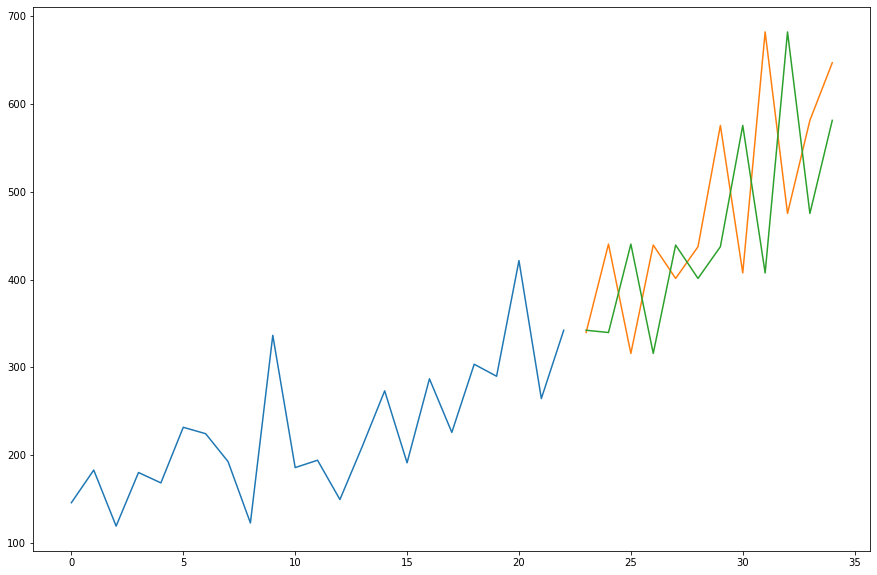

In [19]:
pyplot.figure(figsize=(15,10))
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()